# 1. 데이터 파악

In [18]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
pred = pd.read_csv("musics.csv")

train

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [2]:
pred

,artist_name,track_name,track_id,year,market,track_popularity,artist_id,danceability,energy,key,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,videoId
0,David Bowie,Starman - 2012 Remaster,0pQskrTITgmCMyr85tb9qq,1972,KR,75,0oSGxfWSnnOXhD2fKuz2Gy,0.486,0.449,5,...,0.549,100.456,audio_features,0pQskrTITgmCMyr85tb9qq,spotify:track:0pQskrTITgmCMyr85tb9qq,https://api.spotify.com/v1/tracks/0pQskrTITgmC...,https://api.spotify.com/v1/audio-analysis/0pQs...,254293,4,aBKEt3MhNMM
1,Al Green,Let's Stay Together,63xdwScd1Ai1GigAwQxE8y,1972,KR,74,3dkbV4qihUeMsqN4vBGg93,0.756,0.401,7,...,0.514,101.954,audio_features,63xdwScd1Ai1GigAwQxE8y,spotify:track:63xdwScd1Ai1GigAwQxE8y,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,199396,4,COiIC3A0ROM
2,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",3gdewACMIVMEWVbyb8O9sY,1972,KR,80,3PhoLpVuITZKcymswpck5b,0.601,0.532,10,...,0.341,136.571,audio_features,3gdewACMIVMEWVbyb8O9sY,spotify:track:3gdewACMIVMEWVbyb8O9sY,https://api.spotify.com/v1/tracks/3gdewACMIVME...,https://api.spotify.com/v1/audio-analysis/3gde...,281613,4,DtVBCG6ThDk
3,Deep Purple,Smoke On The Water - Remastered 2012,5MMnwYs0hIxkENRsbkWJ2G,1972,KR,73,568ZhdwyaiCyOGJRtNYhWf,0.598,0.676,0,...,0.805,114.169,audio_features,5MMnwYs0hIxkENRsbkWJ2G,spotify:track:5MMnwYs0hIxkENRsbkWJ2G,https://api.spotify.com/v1/tracks/5MMnwYs0hIxk...,https://api.spotify.com/v1/audio-analysis/5MMn...,340742,4,kjO4UISSkKU
4,Carpenters,Top Of The World,1Ehdm1PDlKrdfyBsjwEvd1,1972,KR,67,1eEfMU2AhEo7XnKgL7c304,0.379,0.343,10,...,0.694,184.301,audio_features,1Ehdm1PDlKrdfyBsjwEvd1,spotify:track:1Ehdm1PDlKrdfyBsjwEvd1,https://api.spotify.com/v1/tracks/1Ehdm1PDlKrd...,https://api.spotify.com/v1/audio-analysis/1Ehd...,179173,4,3hyFB6SA7b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81966,Maluma,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022,GL,82,1r4hJ1h58CWwUQe3MxPuau,0.822,0.719,10,...,0.659,82.010,audio_features,3SlKme42qm1vWrkl3BrZmm,spotify:track:3SlKme42qm1vWrkl3BrZmm,https://api.spotify.com/v1/tracks/3SlKme42qm1v...,https://api.spotify.com/v1/audio-analysis/3SlK...,225366,4,WcOJ2mRlg4Y
81967,ITZY,SNEAKERS,2WoluqyWzsgRmFCeHeGlnm,2022,GL,79,2KC9Qb60EaY0kW4eH68vr3,0.935,0.849,7,...,0.551,119.986,audio_features,2WoluqyWzsgRmFCeHeGlnm,spotify:track:2WoluqyWzsgRmFCeHeGlnm,https://api.spotify.com/v1/tracks/2WoluqyWzsgR...,https://api.spotify.com/v1/audio-analysis/2Wol...,179453,4,Hbb5GPxXF1w
81968,42 Dugg,IDGAF,3umPlMokEzAFxJO33tNdlY,2022,GL,69,45gHcnDnMC15sgx3VL7ROG,0.514,0.611,4,...,0.311,108.666,audio_features,3umPlMokEzAFxJO33tNdlY,spotify:track:3umPlMokEzAFxJO33tNdlY,https://api.spotify.com/v1/tracks/3umPlMokEzAF...,https://api.spotify.com/v1/audio-analysis/3umP...,138673,5,liLOvA-FGQM
81969,NLE Choppa,Slut Me Out,5BmB3OaQyYXCqRyN8iR2Yi,2022,GL,70,0ErzCpIMyLcjPiwT4elrtZ,0.938,0.606,6,...,0.706,121.108,audio_features,5BmB3OaQyYXCqRyN8iR2Yi,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,https://api.spotify.com/v1/tracks/5BmB3OaQyYXC...,https://api.spotify.com/v1/audio-analysis/5BmB...,123673,4,iss7pgQbQmo


In [3]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81971 entries, 0 to 81970
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       81971 non-null  object 
 1   track_name        81971 non-null  object 
 2   track_id          81971 non-null  object 
 3   year              81971 non-null  int64  
 4   market            81971 non-null  object 
 5   track_popularity  81971 non-null  int64  
 6   artist_id         81971 non-null  object 
 7   danceability      81971 non-null  float64
 8   energy            81971 non-null  float64
 9   key               81971 non-null  int64  
 10  loudness          81971 non-null  float64
 11  mode              81971 non-null  int64  
 12  speechiness       81971 non-null  float64
 13  acousticness      81971 non-null  float64
 14  instrumentalness  81971 non-null  float64
 15  liveness          81971 non-null  float64
 16  valence           81971 non-null  float6

In [19]:
train = pd.DataFrame(train, columns = ['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'])
train

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [5]:
pred_X = pd.DataFrame(pred, columns = ['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature'])
pred_X

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
0,0.486,0.1660,0.449,0.000002,0.5400,0.549,-10.298,0.0267,100.456,5,4
1,0.756,0.5820,0.401,0.011000,0.0541,0.514,-10.702,0.0526,101.954,7,4
2,0.601,0.4320,0.532,0.000006,0.0925,0.341,-9.119,0.0286,136.571,10,4
3,0.598,0.1300,0.676,0.225000,0.1120,0.805,-9.211,0.0279,114.169,0,4
4,0.379,0.8060,0.343,0.000000,0.0991,0.694,-12.993,0.0385,184.301,10,4
...,...,...,...,...,...,...,...,...,...,...,...
81966,0.822,0.1650,0.719,0.000025,0.1740,0.659,-3.633,0.0576,82.010,10,4
81967,0.935,0.0192,0.849,0.000000,0.0223,0.551,-3.047,0.0779,119.986,7,4
81968,0.514,0.0105,0.611,0.000000,0.3120,0.311,-8.227,0.2870,108.666,4,5
81969,0.938,0.1170,0.606,0.000000,0.5280,0.706,-6.396,0.4190,121.108,6,4


In [6]:
pred_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81971 entries, 0 to 81970
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      81971 non-null  float64
 1   acousticness      81971 non-null  float64
 2   energy            81971 non-null  float64
 3   instrumentalness  81971 non-null  float64
 4   liveness          81971 non-null  float64
 5   valence           81971 non-null  float64
 6   loudness          81971 non-null  float64
 7   speechiness       81971 non-null  float64
 8   tempo             81971 non-null  float64
 9   key               81971 non-null  int64  
 10  time_signature    81971 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 6.9 MB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  time_signature    686 non-null    int64  
 11  mood              686 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 64.4+ KB


# 2. 시각화

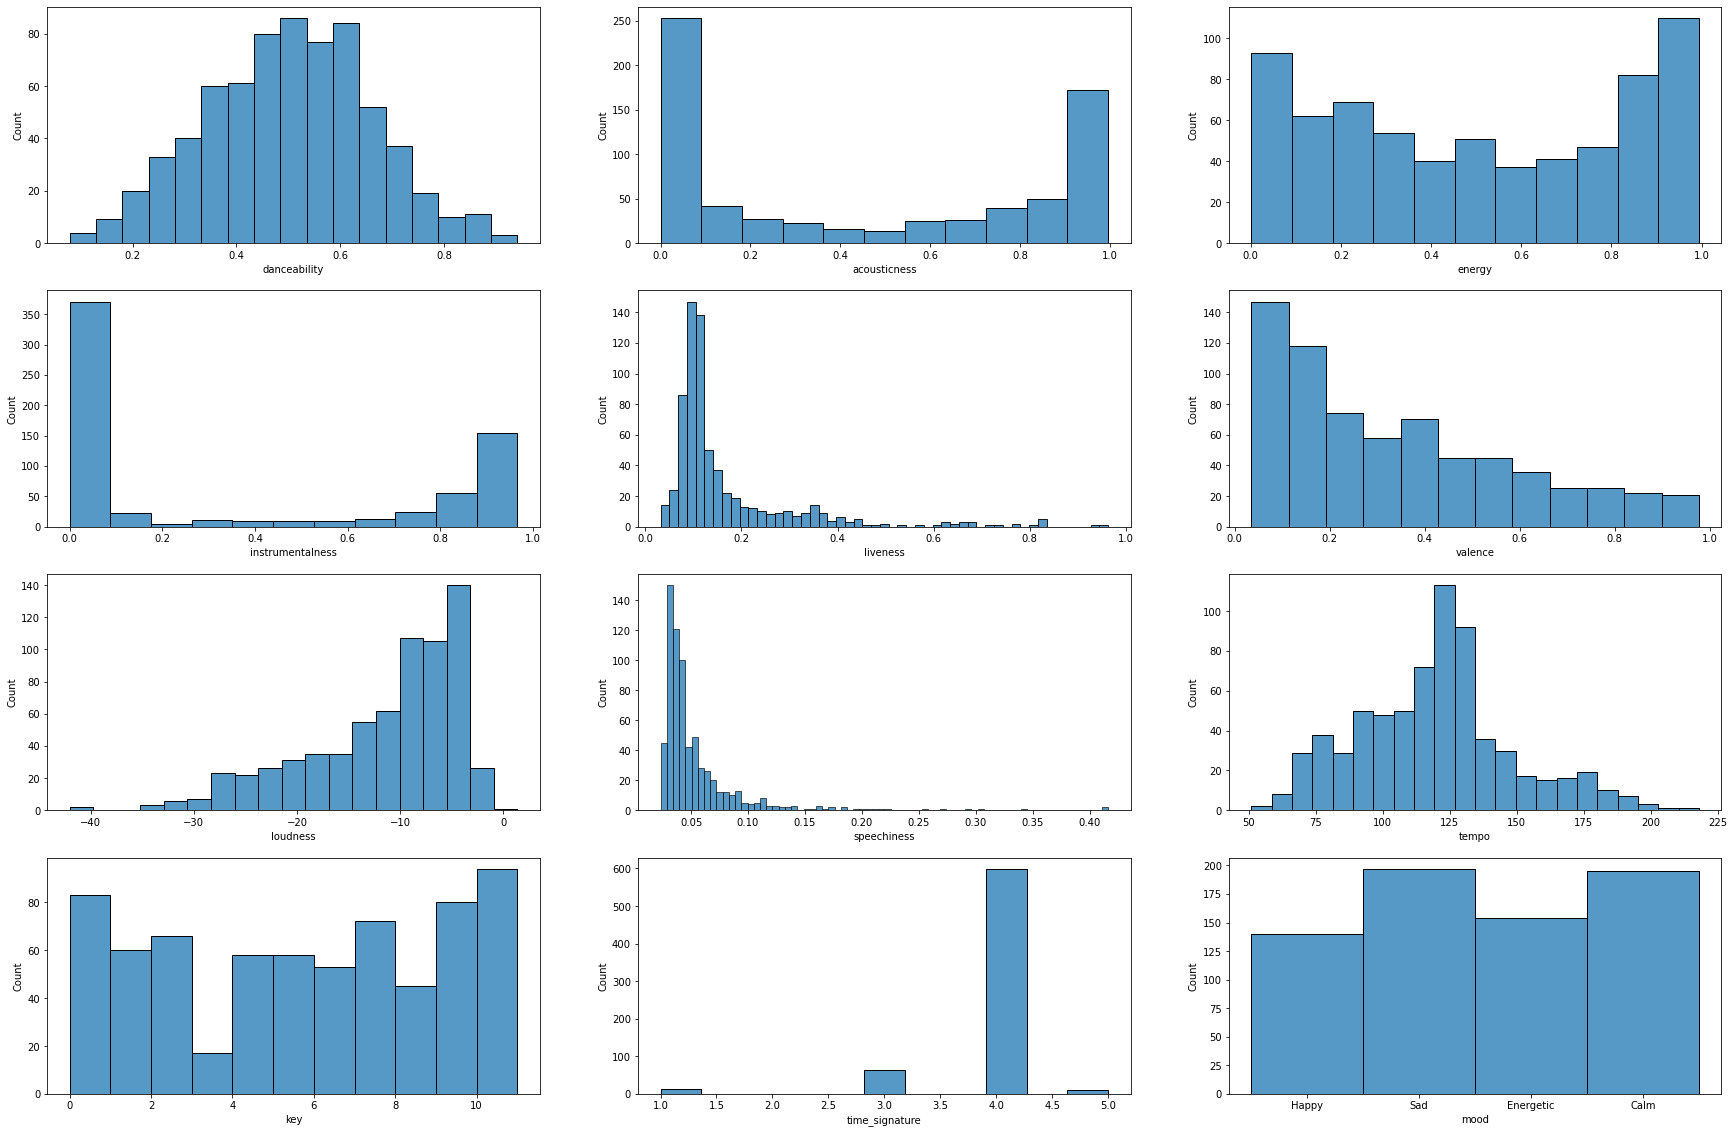

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

f, ax = plt.subplots(4,3, figsize=(30,20))
ax = ax.flatten()
col_list = list(train.columns)
for i in range(len(col_list)):
  sns.histplot(data=train, x= col_list[i],ax=ax[i])
plt.show()

In [14]:
train.columns

Index(['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

# 3. 전처리 (정규화)

In [21]:
train_1 = train[['danceability',  'energy', 
        'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood']]
train_2 = train[['instrumentalness', 'acousticness', 'liveness']]
train_2 = np.log1p(train_2)

,instrumentalness,acousticness,liveness
0,0.000000,0.128393,0.080935
1,0.178983,0.018724,0.142367
2,0.000077,0.648673,0.089292
3,0.000006,0.085260,0.107059
4,0.000000,0.001709,0.128393
...,...,...,...
681,0.651804,0.673455,0.088102
682,0.113329,0.563608,0.131028
683,0.000000,0.579978,0.086728
684,0.000026,0.648673,0.106160


In [22]:
train = pd.concat([train_1, train_2], axis=1)
train

,danceability,energy,valence,loudness,speechiness,tempo,key,time_signature,mood,instrumentalness,acousticness,liveness
0,0.866,0.7300,0.6250,-8.201,0.0767,118.523,5,4,Happy,0.000000,0.128393,0.080935
1,0.381,0.8320,0.1660,-5.069,0.0492,120.255,8,4,Sad,0.178983,0.018724,0.142367
2,0.346,0.1390,0.1160,-15.326,0.0321,136.168,0,4,Sad,0.000077,0.648673,0.089292
3,0.466,0.4380,0.5870,-12.858,0.0608,193.100,4,4,Happy,0.000006,0.085260,0.107059
4,0.419,0.9320,0.4450,-3.604,0.1060,169.881,1,4,Energetic,0.000000,0.001709,0.128393
...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.402,0.2360,0.1460,-20.615,0.0603,129.736,0,3,Calm,0.651804,0.673455,0.088102
682,0.452,0.5150,0.1910,-7.351,0.0255,80.537,11,4,Sad,0.113329,0.563608,0.131028
683,0.642,0.3740,0.0799,-9.386,0.0545,124.099,4,4,Sad,0.000000,0.579978,0.086728
684,0.561,0.0848,0.2060,-15.099,0.0404,102.128,2,4,Sad,0.000026,0.648673,0.106160


In [23]:
pred_1 = pred[['danceability',  'energy', 
        'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature']]
pred_2 = pred[['instrumentalness', 'acousticness', 'liveness']]
pred_2 = np.log1p(pred_2)


pred_X = pd.concat([pred_1, pred_2], axis=1)
pred_X

,danceability,energy,valence,loudness,speechiness,tempo,key,time_signature,instrumentalness,acousticness,liveness
0,0.486,0.449,0.549,-10.298,0.0267,100.456,5,4,0.000002,0.153579,0.431782
1,0.756,0.401,0.514,-10.702,0.0526,101.954,7,4,0.010940,0.458690,0.052687
2,0.601,0.532,0.341,-9.119,0.0286,136.571,10,4,0.000006,0.359072,0.088469
3,0.598,0.676,0.805,-9.211,0.0279,114.169,0,4,0.202941,0.122218,0.106160
4,0.379,0.343,0.694,-12.993,0.0385,184.301,10,4,0.000000,0.591114,0.094492
...,...,...,...,...,...,...,...,...,...,...,...
81966,0.822,0.719,0.659,-3.633,0.0576,82.010,10,4,0.000025,0.152721,0.160417
81967,0.935,0.849,0.551,-3.047,0.0779,119.986,7,4,0.000000,0.019018,0.022055
81968,0.514,0.611,0.311,-8.227,0.2870,108.666,4,5,0.000000,0.010445,0.271553
81969,0.938,0.606,0.706,-6.396,0.4190,121.108,6,4,0.000000,0.110647,0.423960


In [9]:
from sklearn.model_selection import train_test_split
X = train[train.columns[0:11]]
y = train[['mood']]
print(X.shape)
print(y.shape)

(686, 11)
(686, 1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42,test_size = 0.2)
X_train.shape

(548, 11)

# 4. 모델링

# Random Forest

In [63]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix


#파이프라인 생성 - 인코더 / 분류기 한번에 넣기
pipe = make_pipeline(
    OrdinalEncoder(),  # 수치형으로 따로 고려없이 변경진행
    RandomForestClassifier(class_weight= 'balanced') # class weight만 blanced로 넣어 진행해본다.
)

# train set에 학습
pipe.fit(X_train, y_train)

# 정확도 점검
print('검증 정확도:',pipe.score(X_test, y_test))
y_test_pred = pipe.predict(X_test)

검증 정확도: 0.782608695652174


C:\Users\juju\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


## Grid Search

In [66]:
import warnings
warnings.filterwarnings(action='ignore')

In [67]:
%%time

from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    OrdinalEncoder(),  
    RandomForestClassifier( class_weight= 'balanced')
)

# 최적값을 구하고 싶은 파라미터를 정리 
dists = {
    'randomforestclassifier__max_depth' : [3,5,10,15],
    'randomforestclassifier__max_features' : [3,5,10],
    'randomforestclassifier__n_estimators' : [80, 100, 150, 200]
}

# RandomizedSearchCV 작성
grid= GridSearchCV(
    pipe,
    param_grid=dists, # 파라미터 입력
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='accuracy',  # 오차 평가방법
    verbose=1,     # 진행상황
  )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


CPU times: total: 45.2 s
Wall time: 45.6 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced'))]),
             param_grid={'randomforestclassifier__max_depth': [3, 5, 10, 15],
                         'randomforestclassifier__max_features': [3, 5, 10],
                         'randomforestclassifier__n_estimators': [80, 100, 150,
                                                                  200]},
             scoring='accuracy', verbose=1)

In [68]:
from sklearn.metrics import accuracy_score
print('최적 하이퍼파라미터: ', grid.best_params_)
y_test_pred = grid.predict(X_test)
print('검증 정확도:', grid.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__n_estimators': 150}
검증 정확도: 0.8229691409507923


# GBM

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
trainX = X_train
trainY = y_train
trainX

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
273,0.365,0.983000,0.1190,0.919000,0.1120,0.2490,-20.962,0.0405,147.573,7,4
567,0.682,0.009530,0.9100,0.067300,0.0732,0.5360,-2.314,0.0431,122.943,11,4
16,0.492,0.000444,0.9500,0.000062,0.2200,0.3910,-4.195,0.0760,110.027,2,4
548,0.414,0.827000,0.1270,0.822000,0.0919,0.0354,-22.097,0.0383,130.021,0,4
407,0.524,0.000220,0.9390,0.000000,0.6230,0.6610,-3.994,0.1130,150.184,9,4
...,...,...,...,...,...,...,...,...,...,...,...
413,0.134,0.961000,0.0601,0.869000,0.1090,0.0388,-19.866,0.0352,73.855,7,1
177,0.567,0.839000,0.2670,0.000001,0.0890,0.0592,-6.502,0.0299,110.011,4,4
154,0.354,0.000237,0.9820,0.000294,0.2040,0.1940,-3.026,0.1680,143.772,4,4
293,0.806,0.138000,0.8470,0.001570,0.0670,0.9700,-4.470,0.0319,121.718,0,4


In [90]:
le.

<bound method BaseEstimator.get_params of LabelEncoder()>

In [87]:
trainY

array([0, 1, 1, 0, 1, 3, 3, 0, 3, 3, 2, 2, 1, 2, 0, 0, 3, 1, 2, 1, 0, 0,
       1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 3, 3, 0, 2, 0, 3, 0, 3, 1, 3, 3,
       3, 0, 3, 0, 3, 1, 1, 3, 2, 0, 1, 2, 0, 3, 2, 0, 0, 0, 1, 1, 3, 2,
       3, 0, 3, 2, 2, 1, 0, 3, 3, 0, 3, 3, 1, 3, 3, 2, 1, 3, 0, 0, 1, 0,
       0, 0, 3, 2, 2, 0, 1, 2, 1, 3, 3, 0, 1, 1, 0, 3, 3, 2, 3, 3, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 3, 0, 1, 3, 1, 0, 3, 2, 3, 1, 0,
       1, 2, 0, 3, 1, 3, 3, 0, 3, 3, 2, 0, 3, 3, 3, 2, 2, 2, 0, 1, 2, 1,
       0, 3, 1, 1, 0, 1, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 3, 0, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 2, 3, 1, 3, 2, 0, 2, 2, 3, 0, 3, 0, 1, 0, 2, 0, 2,
       1, 3, 2, 1, 2, 0, 0, 3, 2, 3, 0, 2, 3, 1, 2, 3, 3, 2, 3, 0, 3, 3,
       3, 0, 2, 0, 2, 1, 0, 2, 0, 3, 2, 1, 0, 0, 2, 1, 3, 1, 2, 3, 0, 3,
       3, 1, 1, 2, 0, 2, 0, 0, 2, 2, 3, 3, 0, 0, 1, 2, 1, 3, 1, 3, 1, 1,
       3, 0, 0, 0, 0, 3, 2, 0, 3, 0, 1, 3, 1, 3, 3, 3, 2, 1, 1, 0, 0, 3,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 0, 1, 3, 0, 0, 3,

In [70]:
################################################################################
# GBM        
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# 최적의 파라미터 값 찾아보기
param_gbm = {"max_depth" : [4,5,6,7,8,9,10],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "n_estimators" : [100,200,300,500]
              }

# # cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
gscv_gbm = GridSearchCV (estimator = gbm, param_grid = param_gbm, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_gbm.fit(trainX, trainY)

print("="*30)
print('GBM 파라미터: ', gscv_gbm.best_params_)
print('GBM 예측 정확도: {:.4f}'.format(gscv_gbm.best_score_))
print("="*30)



Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_

[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   1.5s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=500; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.9s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.9s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   1.0s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   0.9s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=500; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=500; total time=   1.1s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=500; total time=   0.9s
[CV] END ...learning_rate=0.3, max_depth=8, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.3, max_depth=9, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=9, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.3, max_depth=9, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=9, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.3, max_depth=9, n_estimators=200; total time=   0.6s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.4, max_depth=9, n_estimators=500; total time=   0.7s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=500; total time=   0.7s
[CV] END ..learning_rate=0.4, max_depth=10, n_estimators=500; total time=   0.8s
[CV] END ..learning_rate=0.4

## LGB  

In [71]:
################################################################################
# LGB    
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()

# 최적의 파라미터 값 찾아보기                 
param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [25, 50, 75],
             "num_leaves" : [100,300,500,900,1200],
             "n_estimators" : [100, 200, 300,500,800,1000],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5]
              }

gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_lgb.fit(trainX, trainY)

print("="*30)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
print("="*30)



Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=

[CV] END learning_rate=0.01, max_depth=25, n_estimators=1000, num_leaves=900; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=1000, num_leaves=900; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=1000, num_leaves=1200; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=1000, num_leaves=1200; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=1000, num_leaves=1200; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max

[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=500; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=500; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=500; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=900; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=900; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=900; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=1200; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=1200; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=50, n_estimators=1000, num_leaves=1200; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01,

[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=300; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=300; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=300; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=500; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=500; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=500; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=900; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=900; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=75, n_estimators=1000, num_leaves=900; total time=   1.8s
[CV] END learning_rate=0.01, m

[CV] END learning_rate=0.1, max_depth=25, n_estimators=800, num_leaves=1200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=800, num_leaves=1200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=100; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=300; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=300; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=300; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=500; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=25, n_estimators=1000, num_leaves=500; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=25

[CV] END learning_rate=0.1, max_depth=50, n_estimators=800, num_leaves=900; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=800, num_leaves=900; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=800, num_leaves=900; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=800, num_leaves=1200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=800, num_leaves=1200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=800, num_leaves=1200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=1000, num_leaves=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=1000, num_leaves=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=1000, num_leaves=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=50, n_estimators=1000, num_leaves=300; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=50, n

[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=500; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=500; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=500; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=900; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=900; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=900; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=1200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=1200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=75, n_estimators=800, num_leaves=1200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=75, n_est

[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=100; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=100; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=300; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=500; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=500; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=500; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=900; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=25, n_estimators=800, num_leaves=900; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=25, n_estima

[CV] END learning_rate=0.2, max_depth=50, n_estimators=500, num_leaves=1200; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=500, num_leaves=1200; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=500, num_leaves=1200; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=100; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=300; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=300; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=300; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=800, num_leaves=500; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=50, n_est

[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=500; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=900; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=900; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=900; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=1200; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=1200; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=500, num_leaves=1200; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=800, num_leaves=100; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=800, num_leaves=100; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=75, n_estimators=800, num_leaves=100; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=75, n_est

[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=900; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=1200; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=25, n_estimators=500, num_leaves=1200; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=25, n_esti

[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=100; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=100; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=900; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=50, n_estimators=500, num_leaves=900; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=50, n_estima

[CV] END learning_rate=0.3, max_depth=75, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=100; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=100; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=100; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=300; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_estimators=500, num_leaves=500; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=75, n_est

[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=500, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=500, num_leaves=100; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=25, n_estimators=500, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=25, n_est

[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=50, n_estimators=300, num_leaves=1200; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=50, n_esti

[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.4, max_depth=75, n_estimators=300, num_leaves=900; total time=   0.1s
[CV] END learning_rate=0.4, max_depth=75, n_estima

[CV] END learning_rate=0.5, max_depth=25, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_estimators=300, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=25, n_est

[CV] END learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_estimators=300, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=50, n_est

[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=900; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=200, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_estimators=300, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=75, n_est

# XGB

In [72]:
################################################################################
# XGB
from xgboost import XGBClassifier
xgb = XGBClassifier()

# 최적의 파라미터 값 찾아보기
from sklearn.model_selection import GridSearchCV
param_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300,500,1000]
              }    

gscv_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_xgb.fit(trainX, trainY)

print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))
print("="*30)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.2s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   0.3s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   0.2s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, min_child_weight=1, n_estimators=1000; total time=   0.4s
[CV] END max_depth=10, min_child_weight=1, n_estimators=1000; total time=   0.4s
[CV] END max_depth=10, min_child_weight=1, n_es

[CV] END .max_depth=50, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END .max_depth=50, min_child_weight=1, n_estimators=500; total time=   0.2s
[CV] END .max_depth=50, min_child_weight=1, n_estimators=500; total time=   0.2s
[CV] END .max_depth=50, min_child_weight=1, n_estimators=500; total time=   0.2s
[CV] END max_depth=50, min_child_weight=1, n_estimators=1000; total time=   0.6s
[CV] END max_depth=50, min_child_weight=1, n_estimators=1000; total time=   0.8s
[CV] END max_depth=50, min_child_weight=1, n_estimators=1000; total time=   0.7s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=200; total time=   0.0s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=200; total time=   0.1s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=200; total time=   0.0s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=300; total time=   0.1s
[CV] END .max_depth=50, min_

In [73]:
gscv_rf = grid 

In [74]:
print("="*30)
print('rf 파라미터: ', gscv_rf.best_params_)
print('rf 예측 정확도: {:.4f}'.format(gscv_rf.best_score_))
print("="*30)


print("="*30)
print('GBM 파라미터: ', gscv_gbm.best_params_)
print('GBM 예측 정확도: {:.4f}'.format(gscv_gbm.best_score_))
print("="*30)


print("="*30)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
print("="*30)


print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))
print("="*30)

rf 파라미터:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__n_estimators': 150}
rf 예측 정확도: 0.8230
GBM 파라미터:  {'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 100}
GBM 예측 정확도: 0.8138
LGB 파라미터:  {'learning_rate': 0.3, 'max_depth': 25, 'n_estimators': 500, 'num_leaves': 100}
LGB 예측 정확도: 0.8266
XGB 파라미터:  {'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 500}
XGB 예측 정확도: 0.8230


# 5. 분석

In [ ]:
# rf3 = RandomForestRegressor(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300).fit(X, y)
# rf3_pred = rf3.predict(target)

In [92]:
lgb_pred = gscv_lgb.predict(pred_X)
lgb_pred = le.inverse_transform(lgb_pred)
lgb_pred

array(['Sad', 'Sad', 'Sad', ..., 'Sad', 'Happy', 'Sad'], dtype=object)

In [83]:
rf_pred = gscv_rf.predict(pred_X)
rf_pred

array(['Happy', 'Happy', 'Sad', ..., 'Sad', 'Happy', 'Sad'], dtype=object)

In [ ]:
lgb_pred = gscv_lgb.predict(pred_X)
lgb_pred = le.inverse_transform(lgb_pred)
lgb_pred

In [93]:
pred

,artist_name,track_name,track_id,year,market,track_popularity,artist_id,danceability,energy,key,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,videoId
0,David Bowie,Starman - 2012 Remaster,0pQskrTITgmCMyr85tb9qq,1972,KR,75,0oSGxfWSnnOXhD2fKuz2Gy,0.486,0.449,5,...,0.549,100.456,audio_features,0pQskrTITgmCMyr85tb9qq,spotify:track:0pQskrTITgmCMyr85tb9qq,https://api.spotify.com/v1/tracks/0pQskrTITgmC...,https://api.spotify.com/v1/audio-analysis/0pQs...,254293,4,aBKEt3MhNMM
1,Al Green,Let's Stay Together,63xdwScd1Ai1GigAwQxE8y,1972,KR,74,3dkbV4qihUeMsqN4vBGg93,0.756,0.401,7,...,0.514,101.954,audio_features,63xdwScd1Ai1GigAwQxE8y,spotify:track:63xdwScd1Ai1GigAwQxE8y,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,199396,4,COiIC3A0ROM
2,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",3gdewACMIVMEWVbyb8O9sY,1972,KR,80,3PhoLpVuITZKcymswpck5b,0.601,0.532,10,...,0.341,136.571,audio_features,3gdewACMIVMEWVbyb8O9sY,spotify:track:3gdewACMIVMEWVbyb8O9sY,https://api.spotify.com/v1/tracks/3gdewACMIVME...,https://api.spotify.com/v1/audio-analysis/3gde...,281613,4,DtVBCG6ThDk
3,Deep Purple,Smoke On The Water - Remastered 2012,5MMnwYs0hIxkENRsbkWJ2G,1972,KR,73,568ZhdwyaiCyOGJRtNYhWf,0.598,0.676,0,...,0.805,114.169,audio_features,5MMnwYs0hIxkENRsbkWJ2G,spotify:track:5MMnwYs0hIxkENRsbkWJ2G,https://api.spotify.com/v1/tracks/5MMnwYs0hIxk...,https://api.spotify.com/v1/audio-analysis/5MMn...,340742,4,kjO4UISSkKU
4,Carpenters,Top Of The World,1Ehdm1PDlKrdfyBsjwEvd1,1972,KR,67,1eEfMU2AhEo7XnKgL7c304,0.379,0.343,10,...,0.694,184.301,audio_features,1Ehdm1PDlKrdfyBsjwEvd1,spotify:track:1Ehdm1PDlKrdfyBsjwEvd1,https://api.spotify.com/v1/tracks/1Ehdm1PDlKrd...,https://api.spotify.com/v1/audio-analysis/1Ehd...,179173,4,3hyFB6SA7b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81966,Maluma,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022,GL,82,1r4hJ1h58CWwUQe3MxPuau,0.822,0.719,10,...,0.659,82.010,audio_features,3SlKme42qm1vWrkl3BrZmm,spotify:track:3SlKme42qm1vWrkl3BrZmm,https://api.spotify.com/v1/tracks/3SlKme42qm1v...,https://api.spotify.com/v1/audio-analysis/3SlK...,225366,4,WcOJ2mRlg4Y
81967,ITZY,SNEAKERS,2WoluqyWzsgRmFCeHeGlnm,2022,GL,79,2KC9Qb60EaY0kW4eH68vr3,0.935,0.849,7,...,0.551,119.986,audio_features,2WoluqyWzsgRmFCeHeGlnm,spotify:track:2WoluqyWzsgRmFCeHeGlnm,https://api.spotify.com/v1/tracks/2WoluqyWzsgR...,https://api.spotify.com/v1/audio-analysis/2Wol...,179453,4,Hbb5GPxXF1w
81968,42 Dugg,IDGAF,3umPlMokEzAFxJO33tNdlY,2022,GL,69,45gHcnDnMC15sgx3VL7ROG,0.514,0.611,4,...,0.311,108.666,audio_features,3umPlMokEzAFxJO33tNdlY,spotify:track:3umPlMokEzAFxJO33tNdlY,https://api.spotify.com/v1/tracks/3umPlMokEzAF...,https://api.spotify.com/v1/audio-analysis/3umP...,138673,5,liLOvA-FGQM
81969,NLE Choppa,Slut Me Out,5BmB3OaQyYXCqRyN8iR2Yi,2022,GL,70,0ErzCpIMyLcjPiwT4elrtZ,0.938,0.606,6,...,0.706,121.108,audio_features,5BmB3OaQyYXCqRyN8iR2Yi,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,https://api.spotify.com/v1/tracks/5BmB3OaQyYXC...,https://api.spotify.com/v1/audio-analysis/5BmB...,123673,4,iss7pgQbQmo


In [95]:
pred_X['mood'] = lgb_pred

In [96]:
pred_X

,danceability,energy,valence,loudness,speechiness,tempo,key,time_signature,instrumentalness,acousticness,liveness,mood
0,0.486,0.449,0.549,-10.298,0.0267,100.456,5,4,0.000002,0.153579,0.431782,Sad
1,0.756,0.401,0.514,-10.702,0.0526,101.954,7,4,0.010940,0.458690,0.052687,Sad
2,0.601,0.532,0.341,-9.119,0.0286,136.571,10,4,0.000006,0.359072,0.088469,Sad
3,0.598,0.676,0.805,-9.211,0.0279,114.169,0,4,0.202941,0.122218,0.106160,Energetic
4,0.379,0.343,0.694,-12.993,0.0385,184.301,10,4,0.000000,0.591114,0.094492,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
81966,0.822,0.719,0.659,-3.633,0.0576,82.010,10,4,0.000025,0.152721,0.160417,Happy
81967,0.935,0.849,0.551,-3.047,0.0779,119.986,7,4,0.000000,0.019018,0.022055,Sad
81968,0.514,0.611,0.311,-8.227,0.2870,108.666,4,5,0.000000,0.010445,0.271553,Sad
81969,0.938,0.606,0.706,-6.396,0.4190,121.108,6,4,0.000000,0.110647,0.423960,Happy


In [97]:
pred.columns

Index(['artist_name', 'track_name', 'track_id', 'year', 'market',
       'track_popularity', 'artist_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'videoId'],
      dtype='object')

In [101]:
musics_1 = pred[['artist_name', 'track_name', 'track_id', 'year', 'market',
       'track_popularity', 'artist_id', 'videoId']]
musics_1

,artist_name,track_name,track_id,year,market,track_popularity,artist_id,videoId
0,David Bowie,Starman - 2012 Remaster,0pQskrTITgmCMyr85tb9qq,1972,KR,75,0oSGxfWSnnOXhD2fKuz2Gy,aBKEt3MhNMM
1,Al Green,Let's Stay Together,63xdwScd1Ai1GigAwQxE8y,1972,KR,74,3dkbV4qihUeMsqN4vBGg93,COiIC3A0ROM
2,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",3gdewACMIVMEWVbyb8O9sY,1972,KR,80,3PhoLpVuITZKcymswpck5b,DtVBCG6ThDk
3,Deep Purple,Smoke On The Water - Remastered 2012,5MMnwYs0hIxkENRsbkWJ2G,1972,KR,73,568ZhdwyaiCyOGJRtNYhWf,kjO4UISSkKU
4,Carpenters,Top Of The World,1Ehdm1PDlKrdfyBsjwEvd1,1972,KR,67,1eEfMU2AhEo7XnKgL7c304,3hyFB6SA7b4
...,...,...,...,...,...,...,...,...
81966,Maluma,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022,GL,82,1r4hJ1h58CWwUQe3MxPuau,WcOJ2mRlg4Y
81967,ITZY,SNEAKERS,2WoluqyWzsgRmFCeHeGlnm,2022,GL,79,2KC9Qb60EaY0kW4eH68vr3,Hbb5GPxXF1w
81968,42 Dugg,IDGAF,3umPlMokEzAFxJO33tNdlY,2022,GL,69,45gHcnDnMC15sgx3VL7ROG,liLOvA-FGQM
81969,NLE Choppa,Slut Me Out,5BmB3OaQyYXCqRyN8iR2Yi,2022,GL,70,0ErzCpIMyLcjPiwT4elrtZ,iss7pgQbQmo


In [99]:
musics_2 = pred_X

In [100]:
musics_2

,danceability,energy,valence,loudness,speechiness,tempo,key,time_signature,instrumentalness,acousticness,liveness,mood
0,0.486,0.449,0.549,-10.298,0.0267,100.456,5,4,0.000002,0.153579,0.431782,Sad
1,0.756,0.401,0.514,-10.702,0.0526,101.954,7,4,0.010940,0.458690,0.052687,Sad
2,0.601,0.532,0.341,-9.119,0.0286,136.571,10,4,0.000006,0.359072,0.088469,Sad
3,0.598,0.676,0.805,-9.211,0.0279,114.169,0,4,0.202941,0.122218,0.106160,Energetic
4,0.379,0.343,0.694,-12.993,0.0385,184.301,10,4,0.000000,0.591114,0.094492,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
81966,0.822,0.719,0.659,-3.633,0.0576,82.010,10,4,0.000025,0.152721,0.160417,Happy
81967,0.935,0.849,0.551,-3.047,0.0779,119.986,7,4,0.000000,0.019018,0.022055,Sad
81968,0.514,0.611,0.311,-8.227,0.2870,108.666,4,5,0.000000,0.010445,0.271553,Sad
81969,0.938,0.606,0.706,-6.396,0.4190,121.108,6,4,0.000000,0.110647,0.423960,Happy


In [104]:
musics = pd.concat([musics_1, musics_2], axis=1)
musics

,artist_name,track_name,track_id,year,market,track_popularity,artist_id,videoId,danceability,energy,valence,loudness,speechiness,tempo,key,time_signature,instrumentalness,acousticness,liveness,mood
0,David Bowie,Starman - 2012 Remaster,0pQskrTITgmCMyr85tb9qq,1972,KR,75,0oSGxfWSnnOXhD2fKuz2Gy,aBKEt3MhNMM,0.486,0.449,0.549,-10.298,0.0267,100.456,5,4,0.000002,0.153579,0.431782,Sad
1,Al Green,Let's Stay Together,63xdwScd1Ai1GigAwQxE8y,1972,KR,74,3dkbV4qihUeMsqN4vBGg93,COiIC3A0ROM,0.756,0.401,0.514,-10.702,0.0526,101.954,7,4,0.010940,0.458690,0.052687,Sad
2,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",3gdewACMIVMEWVbyb8O9sY,1972,KR,80,3PhoLpVuITZKcymswpck5b,DtVBCG6ThDk,0.601,0.532,0.341,-9.119,0.0286,136.571,10,4,0.000006,0.359072,0.088469,Sad
3,Deep Purple,Smoke On The Water - Remastered 2012,5MMnwYs0hIxkENRsbkWJ2G,1972,KR,73,568ZhdwyaiCyOGJRtNYhWf,kjO4UISSkKU,0.598,0.676,0.805,-9.211,0.0279,114.169,0,4,0.202941,0.122218,0.106160,Energetic
4,Carpenters,Top Of The World,1Ehdm1PDlKrdfyBsjwEvd1,1972,KR,67,1eEfMU2AhEo7XnKgL7c304,3hyFB6SA7b4,0.379,0.343,0.694,-12.993,0.0385,184.301,10,4,0.000000,0.591114,0.094492,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81966,Maluma,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022,GL,82,1r4hJ1h58CWwUQe3MxPuau,WcOJ2mRlg4Y,0.822,0.719,0.659,-3.633,0.0576,82.010,10,4,0.000025,0.152721,0.160417,Happy
81967,ITZY,SNEAKERS,2WoluqyWzsgRmFCeHeGlnm,2022,GL,79,2KC9Qb60EaY0kW4eH68vr3,Hbb5GPxXF1w,0.935,0.849,0.551,-3.047,0.0779,119.986,7,4,0.000000,0.019018,0.022055,Sad
81968,42 Dugg,IDGAF,3umPlMokEzAFxJO33tNdlY,2022,GL,69,45gHcnDnMC15sgx3VL7ROG,liLOvA-FGQM,0.514,0.611,0.311,-8.227,0.2870,108.666,4,5,0.000000,0.010445,0.271553,Sad
81969,NLE Choppa,Slut Me Out,5BmB3OaQyYXCqRyN8iR2Yi,2022,GL,70,0ErzCpIMyLcjPiwT4elrtZ,iss7pgQbQmo,0.938,0.606,0.706,-6.396,0.4190,121.108,6,4,0.000000,0.110647,0.423960,Happy


In [106]:
musics.to_csv('musics.csv',index_label='id')